In [99]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

%matplotlib inline

# Set random seed
random_state = 42

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report

## Import dataset

In [101]:
data = 'stroke_dataset/healthcare-dataset-stroke-data.csv'

In [102]:
df = pd.read_csv(data)

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [103]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never_smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,female,80.0,1,0,yes,private,urban,83.75,NaN,never_smoked,0
5106,44873,female,81.0,0,0,yes,self-employed,urban,125.20,40.0,never_smoked,0
5107,19723,female,35.0,0,0,yes,self-employed,rural,82.99,30.6,never_smoked,0
5108,37544,male,51.0,0,0,yes,private,rural,166.29,25.6,formerly_smoked,0


In [104]:
df = df.drop('id', axis=1)

## Missing values

In [105]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [106]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [107]:
ratio_null = df.bmi.isnull().sum() / len(df)
ratio_null

np.float64(0.03933463796477495)

In [108]:
median=df['bmi'].median()
df.bmi = df.bmi.fillna(median)

In [109]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.1,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,female,80.0,1,0,yes,private,urban,83.75,28.1,never_smoked,0
5106,female,81.0,0,0,yes,self-employed,urban,125.20,40.0,never_smoked,0
5107,female,35.0,0,0,yes,self-employed,rural,82.99,30.6,never_smoked,0
5108,male,51.0,0,0,yes,private,rural,166.29,25.6,formerly_smoked,0


In [110]:
len(df)

5110

## Explore numerical values

<Axes: xlabel='age', ylabel='Count'>

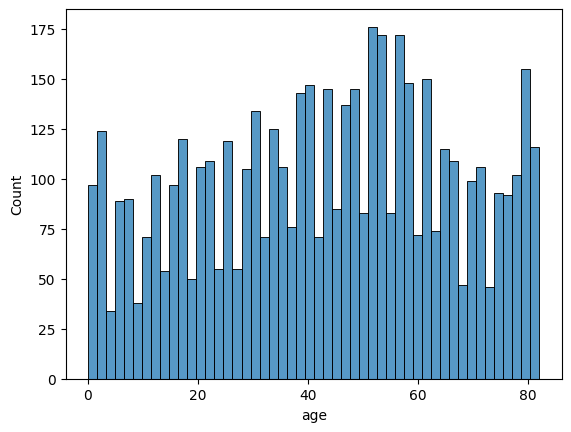

In [111]:
sns.histplot(df.age, bins=50)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

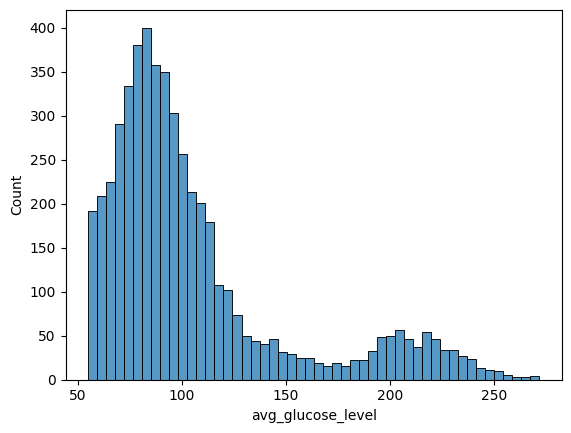

In [112]:
sns.histplot(df.avg_glucose_level, bins=50)

<Axes: xlabel='bmi', ylabel='Count'>

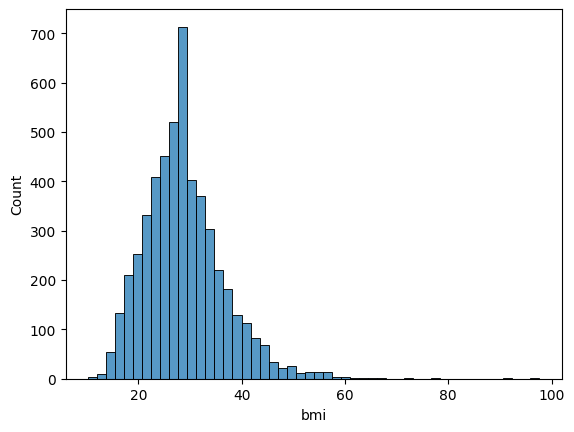

In [113]:
sns.histplot(df.bmi, bins=50)

## Resample to manage class imbalance

In [114]:
df.stroke.value_counts(normalize=True) #big class imbalance

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [115]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [116]:
numerical = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [117]:
categorical = ['gender',
              'ever_married',
              'work_type',
              'residence_type',
              'smoking_status']

In [118]:
features = numerical + categorical

In [119]:
df[categorical].nunique()

gender            3
ever_married      2
work_type         5
residence_type    2
smoking_status    4
dtype: int64

In [120]:
len(df)

5110

In [121]:
from sklearn.utils import resample

# Separate the dataset into two groups: stroke = 1 and stroke = 0
df_stroke_1 = df[df['stroke'] == 1]
df_stroke_0 = df[df['stroke'] == 0]

In [122]:
# Set the size of the groups based on the desired ratio
n_stroke_1 = len(df_stroke_1)
n_stroke_0 = 400  # Desired size for approx. 38% of stroke = 1 in the new dataset

In [123]:
# Downsample the stroke = 0 group to balance the dataset
df_stroke_0_resampled = resample(
    df_stroke_0,
    replace=False,  # Without replacement
    n_samples=n_stroke_0,
    random_state=42  # For reproducibility
)

In [124]:
# Combine the two subsets to create the new balanced dataset
df_resampled = pd.concat([df_stroke_1, df_stroke_0_resampled])

In [125]:
# Reset the index to avoid conflicts
df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [126]:
# Check the proportions
print("Proportions after resampling:")
print(df_resampled['stroke'].value_counts(normalize=True))

Proportions after resampling:
stroke
0    0.616333
1    0.383667
Name: proportion, dtype: float64


## Split the dataset

In [127]:
df_full_train, df_test = train_test_split(df_resampled, test_size=0.2, random_state=random_state)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_state)

In [128]:
len(df_train), len(df_val), len(df_test)

(389, 130, 130)

In [129]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [130]:
y_train = df_train.stroke.values
y_val = df_val.stroke.values
y_test = df_test.stroke.values

del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

In [131]:
df_full_train[numerical].corrwith(df_full_train.stroke).sort_values(ascending=False)

age                  0.536884
avg_glucose_level    0.259525
heart_disease        0.246399
hypertension         0.156329
bmi                  0.094878
dtype: float64

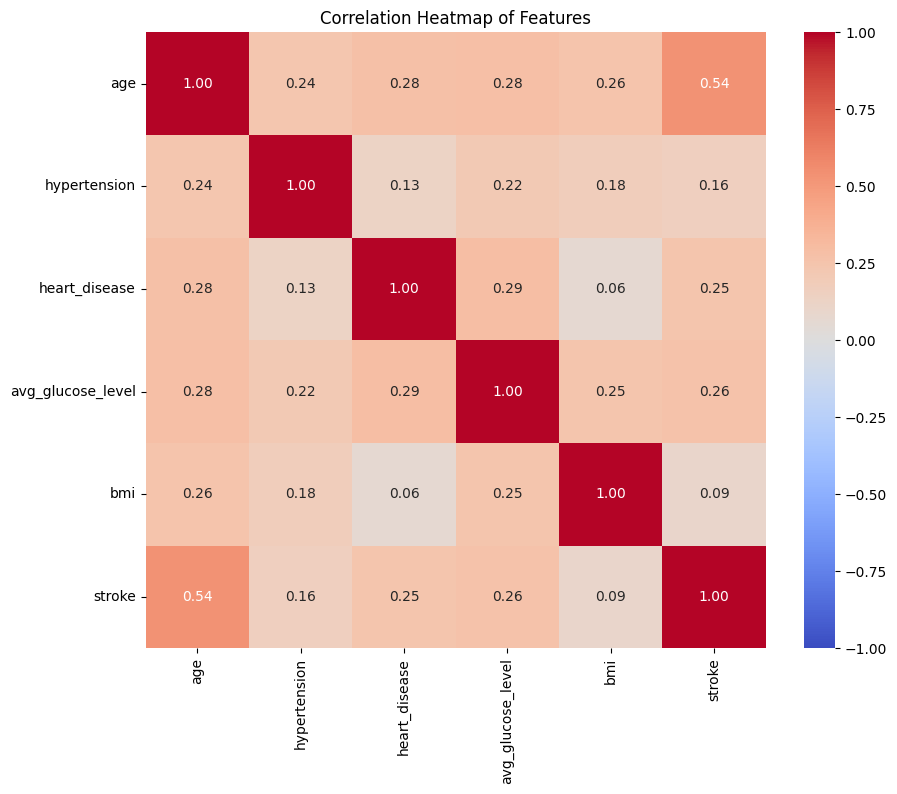

In [132]:
num_columns = df_full_train.select_dtypes(include=['number'])
correlation = num_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features")
plt.show()

In [133]:
from sklearn.metrics import mutual_info_score

In [134]:
df_full_train[categorical].apply(lambda x: mutual_info_score(x, df_full_train.stroke)).sort_values(ascending=False)

work_type         0.030967
ever_married      0.016014
smoking_status    0.005131
residence_type    0.001080
gender            0.000383
dtype: float64

## One-hot encoding

In [135]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [136]:
lr = LogisticRegression(solver='liblinear', random_state=random_state)

lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [137]:
y_pred=lr.predict(X_val)
accuracy=accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
y_pred_stroke = lr.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred_stroke)

print(f'Accuracy is {accuracy} \n')
print(f'Precision is {precision} \n')
print(f'Recall is {recall} \n')
print(f'F1 is {f1} \n')
print(f'AUC_ROC Score is {auc}')



Accuracy is 0.7384615384615385 

Precision is 0.6739130434782609 

Recall is 0.62 

F1 is 0.6458333333333334 

AUC_ROC Score is 0.8205


In [138]:
scores=[]
c_list=[0.1,0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8, 1.0]
for l in ['l1','l2']:
    for c in tqdm(c_list):
        lr=LogisticRegression(penalty=l, C=c, solver='liblinear', random_state=random_state)
        lr.fit(X_train, y_train)
        y_pred=lr.predict(X_val)
        accuracy=accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        
        scores.append((l, c, accuracy, precision, recall, f1))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 191.78it/s]


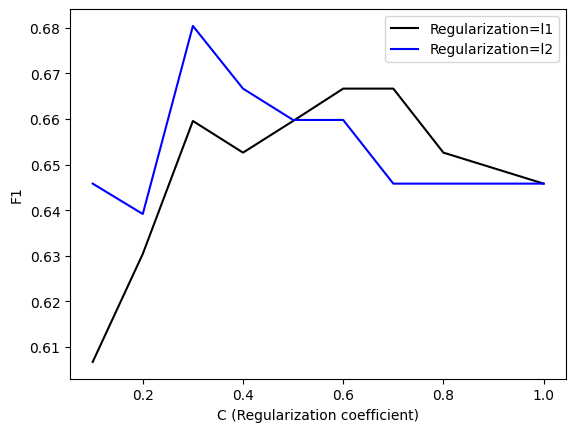

In [139]:
df_scores = pd.DataFrame(scores, columns=['L','C', 'accuracy', 'precision', 'recall', 'f1'])
colors = ['black', 'blue']
l_values = ['l1', 'l2']

for l, col in zip(l_values, colors):
    df_subset = df_scores[df_scores.L == l]
    
    
    plt.plot(df_subset.C, df_subset.f1,
             color=col,
             label='Regularization=%s' % l)
plt.xlabel('C (Regularization coefficient)')
plt.ylabel('F1')
plt.legend()
plt.show()

In [140]:
max_accuracy=df_scores['f1'].max() # with general  imputation imputed median to numerical columns and mode to categorical columns  (accuracy0.940,  L1, c 0.12 )
df_scores[df_scores['f1']==max_accuracy]

,L,C,accuracy,precision,recall,f1
11,l2,0.3,0.761538,0.702128,0.66,0.680412


In [141]:
l='l1'
c=0.3
lr=LogisticRegression(penalty=l, solver='liblinear', C=c, random_state=random_state)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_val)

In [142]:
thresholds = np.linspace(0, 1, 21)

scores=[]

for t in thresholds:
    p=precision_score(y_val, y_pred>=t)
    r=recall_score(y_val, y_pred>=t)
    f1=f1_score(y_val, y_pred>=t)
    scores.append((t,p,r,f1))


In [143]:
df_precision_recall=pd.DataFrame(scores, columns=['Threshold','Precision', 'Recall', 'F1'])

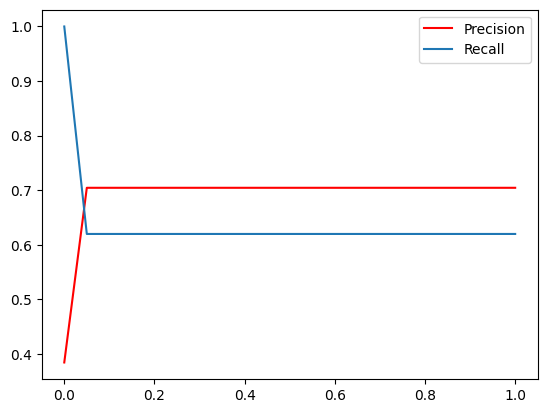

In [144]:
plt.plot(thresholds, df_precision_recall.Precision, label='Precision', color='red')
plt.plot(thresholds, df_precision_recall.Recall, label='Recall')
plt.legend()

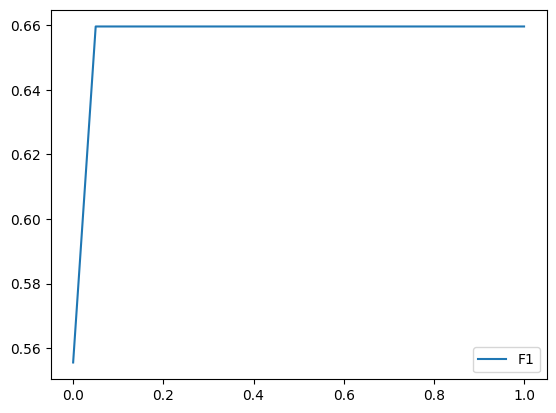

In [145]:
plt.plot(thresholds, df_precision_recall.F1, label='F1')
plt.legend()

In [146]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=random_state)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    
    scores.append((n, f1))

In [147]:
df_rf_scores = pd.DataFrame(scores, columns=['n_estimators', 'f1'])

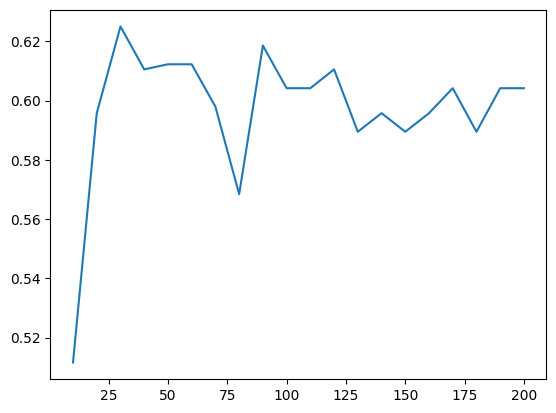

In [148]:
plt.plot(df_rf_scores.n_estimators, df_rf_scores.f1)

In [149]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    random_state=random_state,
                                   max_depth=d)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        
        scores.append((d, n, f1))

In [150]:
columns = ['max_depth', 'n_estimators', 'f1']
df_scores = pd.DataFrame(scores, columns=columns)

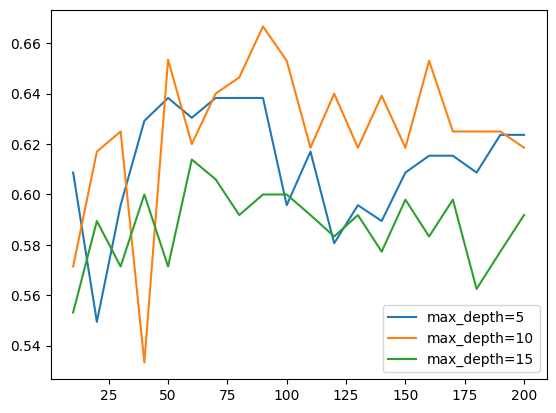

In [151]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.f1,
             label='max_depth=%d' % d)

plt.legend()

In [152]:
max_depth = 10

In [162]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=random_state)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        f1 = f1_score(y_val, y_pred)

        scores.append((s, n, f1))

In [163]:
columns = ['min_samples_leaf', 'n_estimators', 'f1']
df_scores = pd.DataFrame(scores, columns=columns)

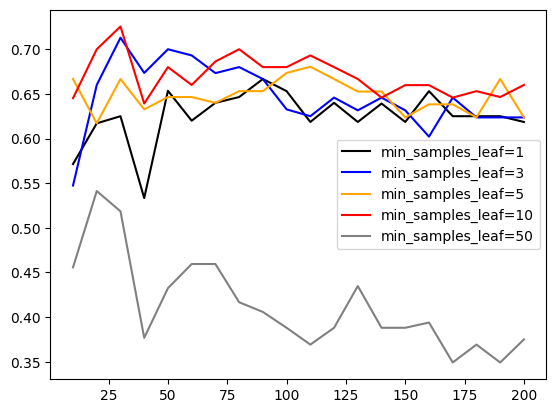

In [164]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.f1,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [165]:
min_samples_leaf = 10

In [166]:
model_script = RandomForestClassifier(n_estimators=100,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=random_state)
model_script.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

In [167]:
y_pred = model_script.predict(X_val)
f1 = f1_score(y_val, y_pred)
f1

0.68

## Save and load the final model (Random Forest)

In [168]:
import pickle

In [169]:
outpout_file = f'model_rf_max_depth={max_depth}_minsampleleaf={min_samples_leaf}.bin'
outpout_file

'model_rf_max_depth=10_minsampleleaf=10.bin'

In [170]:
with open(outpout_file, 'wb') as f_out: # 'wb' means write-binary
    pickle.dump((dv, model_script), f_out)

In [171]:
model_file = 'model_rf_max_depth=10_minsampleleaf=10.bin'

In [172]:
with open(model_file, 'rb') as f_in: # very important to use 'rb' here, it means read-binary 
    dict_vectorizer, model = pickle.load(f_in)

In [173]:
dv, model

(DictVectorizer(sparse=False),
 RandomForestClassifier(max_depth=10, min_samples_leaf=10, random_state=42))

In [174]:
# Randomly select a real patient record from the test set
sample_patient = df_test.sample(1, random_state=42)

# Convert the record to a dictionary format
real_patient_dict = sample_patient.to_dict(orient='records')[0]

print("Real patient dictionary:")
print(real_patient_dict)

Real patient dictionary:
{'gender': 'male', 'age': 81.0, 'hypertension': 0, 'heart_disease': 0, 'ever_married': 'yes', 'work_type': 'private', 'residence_type': 'urban', 'avg_glucose_level': 186.21, 'bmi': 29.0, 'smoking_status': 'formerly_smoked'}


In [175]:
patient = {'gender': 'male',
           'age': 50,
           'hypertension': 0,
           'heart_disease': 0,
           'ever_married': 'yes',
           'work_type': 'private',
           'residence_type': 'urban',
           'avg_glucose_level': 186.21,
           'bmi': 29.0,
           'smoking_status': 'formerly_smoked'}

In [176]:
X = dv.transform([patient])

In [179]:
y_pred = model.predict_proba(X)[0,1]
y_pred

np.float64(0.32425853181740444)